In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df. shape

(2290, 6)

In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
correlation=df.corr(numeric_only=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

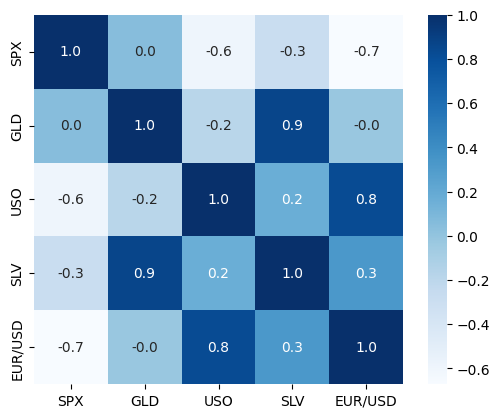

In [9]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_14704\2905665979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='gold')


<AxesSubplot:xlabel='GLD', ylabel='Density'>

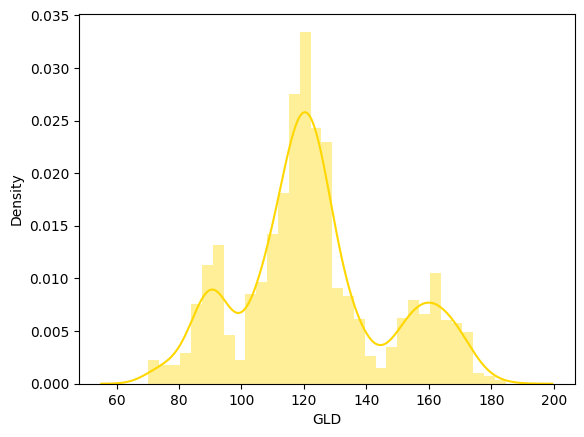

In [11]:
sns.distplot(df['GLD'], color='gold')

In [12]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
regressor=RandomForestRegressor()

In [18]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
test_predict=regressor.predict(X_test)

In [20]:
test_predict

array([168.21069904,  81.9831997 , 116.31250016, 127.67310065,
       120.49860127, 154.82789835, 150.46269828, 126.08310035,
       117.47189878, 126.03850084, 116.73140123, 171.99180112,
       141.17269795, 167.83099891, 115.13570023, 117.62300041,
       139.59210249, 170.35460105, 158.69350257, 156.21029987,
       155.16770043, 125.15490019, 176.31609948, 156.91190308,
       125.16770033,  93.58129929,  77.60959991, 120.09790008,
       119.08599959, 167.65389998,  88.19430055, 125.38419976,
        91.20130071, 117.61650037, 121.10739875, 136.30820117,
       115.35910166, 115.17670043, 147.86809998, 107.18790104,
       104.29180258,  87.05479763, 126.32430066, 117.9885    ,
       153.70599826, 119.69869998, 108.40559982, 108.05889837,
        93.28650039, 127.13909758,  74.90320052, 113.6362994 ,
       121.30100016, 111.27689925, 118.85779878, 120.93719958,
       159.57290017, 167.36650131, 147.16519714,  85.84419883,
        94.25730033,  86.75129875,  90.42740039, 118.96

In [21]:
metrics.r2_score(y_test, test_predict)

0.988942423550801

In [22]:
y_test=list(y_test)

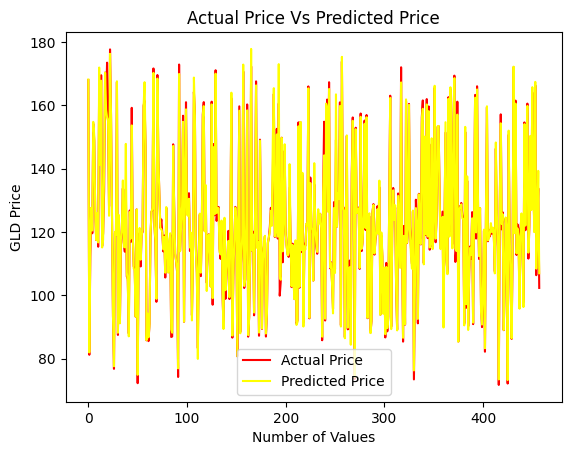

In [23]:
plt.plot(y_test, color='red', label='Actual Price')
plt.plot(test_predict, color='yellow', label='Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()